In [1]:
import pandas as pd
import pathlib

root = pathlib.Path.cwd().parent

df = pd.read_excel(root / "data/first-stage/parish-level-power-station-data.xlsx")

df.columns

Index(['ref_code', 'parish', 'number_of_stations_diesel',
       'number_of_stations_steam', 'number_of_stations_transmitted',
       'number_of_stations_water', 'total_power_diesel', 'total_power_steam',
       'total_power_transmitted', 'total_power_water', 'total_stations',
       'total_power', 'area', 'geom_id', 'treated', 'distance_to_line',
       'touching_treated', 'population_1900', 'population_1910',
       'population_1930'],
      dtype='object')

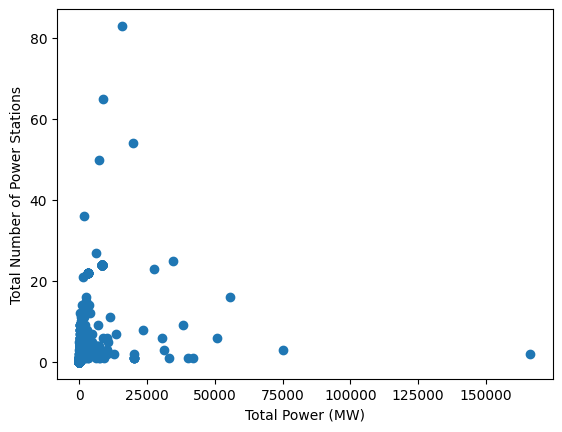

In [2]:
# draw scatter plot with total power and total number of power stations
import matplotlib.pyplot as plt

plt.scatter(df["total_power"], df["total_stations"])
plt.xlabel("Total Power (MW)")
plt.ylabel("Total Number of Power Stations")
plt.show()

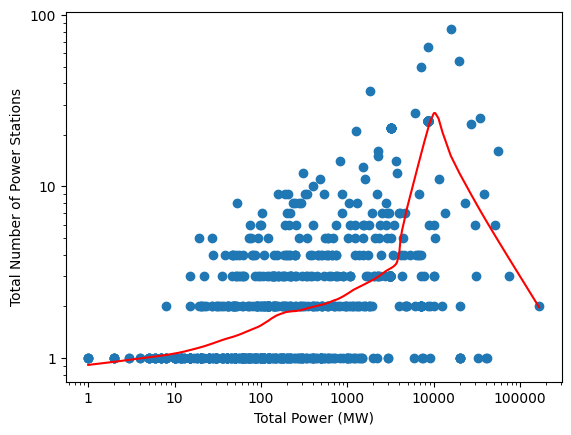

In [9]:
import matplotlib.ticker as ticker

# filter out zero or negative values
df_filtered = df[(df["total_power"] > 0) & (df["total_stations"] > 0)]

# fit loess regression model to log of total power and total stations
lowess = sm.nonparametric.lowess
power_smooth_log = lowess(np.log(df_filtered["total_stations"]), np.log(df_filtered["total_power"]), frac=0.3)

# plot scatter plot with loess regression line
fig, ax = plt.subplots()
ax.scatter(df_filtered["total_power"], df_filtered["total_stations"])
ax.plot(np.exp(power_smooth_log[:, 0]), np.exp(power_smooth_log[:, 1]), color='red')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel("Total Power (MW)")
ax.set_ylabel("Total Number of Power Stations")

# set x-axis and y-axis tick formatter to ScalarFormatter
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())

plt.show()